# Project: Wrangle and Analyse Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import the modules I require
import subprocess
import sys
import pandas as pd
import json
from random import randint
from re import findall
from os import path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

#### Some modules are not imported, yet
##### Why?
* they may not be available out-of-the-box, so to speak
    * this happens in older versions of python

##### Which modules, exactly?
* `tweepy`
* `requests`

##### What then?
* import said modules inside a `try`-`except` block
* a function, `install`, will fire when the `try` block fails
* flow will be as such: 
    
    ```
       try:
           import module
       except ImportError:
           install(module)
           import module
        else:
            # do something IFF `try` succeeds
        finally:
            # do something whether or not an error was thrown
            ```

In [2]:
'''
a function to install modules using `pip`

accepts one arg, type str,that is the name
of the module to install

return: None
'''
def install(mod):
    """function install"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", mod])




In [3]:
#import requests

try:
    import requests
except ImportError:
    install('requests')
    import requests

if requests: 
    print(f'Successfully imported `requests` module...')

Successfully imported `requests` module...


In [5]:
#import tweepy

try:
    import tweepy
except ImportError:
    install('tweepy')
    import tweepy

if tweepy: 
    print(f'Successfully imported `tweepy` module...')

Successfully imported `tweepy` module...


In [35]:
#twtr API details...
'''
#Constants
with open('./keys/twtr_api_keys.json', 'r') as f:
    data = json.load(f)
CONSUMER_KEY = data['api_key']
CONSUMER_SECRET = data['api_key_secret']
ACCESS_TOKEN = data['access_key']
ACCESS_SECRET = data['access_token']
'''

"\n#Constants\nwith open('./keys/twtr_api_keys.json', 'r') as f:\n    data = json.load(f)\nCONSUMER_KEY = data['api_key']\nCONSUMER_SECRET = data['api_key_secret']\nACCESS_TOKEN = data['access_key']\nACCESS_SECRET = data['access_token']\n"

In [2]:
#see if a df exists
'''
a simple function to see if a df exists

takes in 1 arg: name of the df
please do not pass the arg as a string

return: None
'''

def confirm_exists(df):
    """ function confirm_exists """
    if not df.empty:
        print(f'This dataframe exists')
        return
    print(f'This dataframe does not exist')
    

In [3]:
#download twtr archive data then upload it to workspace
twtr_archive = pd.read_csv('twitter_archive_enhanced.csv', sep=',')

In [8]:
#file exists and is not empty
confirm_exists(twtr_archive)

This dataframe exists


In [ ]:
#a way to download twtr archive data, write and save it to file
# w/o physically downloading then uploading it

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
r = requests.get(url)
with open('twitter_archive_enhanced.csv', 'wb') as f:
    f.write(r.content)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#use `requests` to download tweet image prediction data & save to file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
im = requests.get(url)

with open('image_predictions.tsv', 'wb') as f:
    f.write(im.content)

In [9]:
#file exists and is not empty
img_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
confirm_exists(img_predictions)

This dataframe exists


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
#set up the api object
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [12]:
#query additional data via twtr api
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for i in twtr_archive['tweet_id']:
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 736


In [9]:
#append each tweet into a list
with open('tweet_json.txt', 'r') as f:
    tweets = f.readlines()
    try:
        tweet_list = [json.loads(i) for i in f]
    except:
#         continue
#         raise
        pass



In [4]:
# alternative way to append each tweet into a list
tweet_list = []

with open('tweet_json.txt', 'r') as f:
    for i in f:
        try:
            tweet = json.loads(i)
            tweet_list.append(tweet)
        except:
            continue
        

In [8]:
#check length of `tweet_list`
len(tweet_list) #6378 obs

6378

In [5]:
#create an empty df called `df_tweets`
df_tweets = pd.DataFrame()

#add variables and values to df
df_tweets['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
df_tweets['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
df_tweets['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))

In [10]:
#save `df_tweets` as a `.csv` file for ease of reference
df_tweets.to_csv('twitter_api_data.csv', index=False)

In [10]:
#re-load `df-tweets` from `twitter_api_data.csv`
df_tweets = pd.read_csv('twitter_api_data.csv', sep=',')

In [11]:
#file exists and is not empty
confirm_exists(df_tweets)

This dataframe exists


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Method

* assess data sets one by one
* perform the following on each data set:
    * under  heading `Structure`:
        * visual and programmatic assessment
    * list of quality and tidiness issues
* summary list of quality and tidiness issues in all data sets

#### Dataset 1: Dataframe `twtr_archive` that contains archive data

In [13]:
twtr_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twtr_archive.shape

(2356, 17)

In [15]:
twtr_archive.duplicated().value_counts()

False    2356
dtype: int64

In [16]:
twtr_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
twtr_archive.tweet_id.nunique()

2356

In [18]:
twtr_archive.sample(randint(5, 15))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2100,670704688707301377,NaN,NaN,2015-11-28 20:43:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Danny. He's too good to look at the road ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670704688...,6,10,Danny,None,None,None,None
1921,674262580978937856,NaN,NaN,2015-12-08 16:21:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's super stoked about being an ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674262580...,9,10,Gus,None,None,pupper,None
2245,667885044254572545,NaN,NaN,2015-11-21 01:59:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stu. Stu has stacks on stacks and an eye ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667885044...,10,10,Stu,None,None,None,None
2129,670290420111441920,NaN,NaN,2015-11-27 17:17:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandra. She's going skydiving. Nice ad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670290420...,11,10,Sandra,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None
2278,667435689202614272,NaN,NaN,2015-11-19 20:14:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667435689...,12,10,None,None,None,None,None
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None


In [ ]:
twtr_archive

#### Structure

##### Overall

* 2356 observations
    
* 17 variables:
    * 4 of type `float`
    * 3 of type `int`
    * 10 of type `str`
* time stamps are in `str` format:
    * `timestamp`
    * `retweeted_status_timestamp`
* 5 unique IDs:
    * `tweet_id`
    * `in_reply_to_status_id`
    * `in_reply_to_user_id`
    * `retweeted_status_id`
    * `retweeted_status_user_id`
* the age range of a dog is presented qualitatively using the variables:
    * `puppo` -> very young dog
    * `puppy` -> young-to-adolescent dog
    * `doggo` -> adult dog
* the `floofer` variable might represent the fur type and/or fur texture of a dog
    

##### Missing and null values
* 6 out of 17 variables have null values
* case(s) in point:
    * 2278 values missing in the `in_reply_to_status_id` and `in_reply_to_user_id` variables
    * 2175 values missing in the `retweeted_status_id`, `retweeted_status_user_id`  and `retweeted_status_timestamp` variables 

##### Duplicated observations
* `twtr_archive` has no duplicated observations

##### Multiple values for a variable
* observations in `twtr_archive` have a single value per variable
     

#### Quality and tidiness

###### Quality
* missing values for observations
* some values under the `name` variable do not fit in
    * examples: 
        * value `a` in observation `2354`
        * value `such` in observation `22`
* the case of values under the `name` variable is not consistent
    * some values are all lower case
    * the first letter of some is upper case
    * all values in lowercase do not fit in as spelt out above
* some values under the `rating_denominator` variable are not `10`
    * the value of observation `2335`, for example, is `2`


###### Tidiness
* too many variables for a dog's age range
    * it can be represented by one variable, say, `age-range`; the values of `age_range` will be `puppo`, `puppy` or `doggo`
* too many unique IDs

#### Dataset 2: Dataframe `img_predictions` that contains image data

In [19]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
img_predictions.shape

(2075, 12)

In [21]:
img_predictions.duplicated().value_counts()

False    2075
dtype: int64

In [22]:
img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [23]:
img_predictions.tweet_id.nunique()

2075

In [24]:
img_predictions.sample(randint(5, 15))

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
682,683834909291606017,https://pbs.twimg.com/ext_tw_video_thumb/68383...,1,Maltese_dog,0.738449,True,toy_poodle,0.102992,True,Samoyed,0.023247,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
683,683849932751646720,https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg,1,hog,0.458855,False,Mexican_hairless,0.164906,True,wild_boar,0.111700,False
79,667453023279554560,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True


In [ ]:
img_predictions

#### Structure

##### Overall

* 2075 observations   
* 12 variables:
    * 3 of type `float`
    * 2 of type `int`
    * 4 of type `str`
    * 3 of type `bool`
* 1 unique ID: `tweet_id`
* the predicted breed of a dog in a photo is presented using the variable `pN`, where `N` is 1, 2 or 3
    * example: `p1` -> prediction 1
* the likelihood that the breed of a dog is the value of variable `pN` is presented using the variable `pN_conf`
* whether or not the image at `jpg_url` is that of a dog is presented under the variable `pN_dog`    

##### Missing and null values
* `img_predictions` has no missing and/or null values 

##### Duplicated observations
* `img_predictions` has no duplicated observations

##### Multiple values for a variable
* observations in `img_predictions` have a single value per variable
     

#### Quality and tidiness

###### Quality
* values under variables `pN` (where `N` is 1, 2 or 3) do not have a  consistent case
    * examples:
        * value `redbone` in observation `1` under variable `p1`
        * value `Ibizan_hound` in observation `12` under variable `p3`
* some values under variables `pN` do not fit in; that is to say, they are not breeds of dogs
    * examples:
        * value `three-toed_sloth` in observation `21` under variable `p1`
        * value `skunk` in observation `25` under variable `p2`
* some observations do not fit in
    * examples:
        * observation `17` appears to be about birds
        * observation `18` appears to be about library or office equipment
        * observation `25` appears to be about small mammals
    * however, the values of said observations under variables `pN_dog` are `False`. The classifier identified that the respective images in question were not of dogs

* some variable names are not descriptive
    * example: variables `p1`, `p2` and `p3`
       * saves a few keystrokes but is difficult for anyone that assesses the data set. `pred_N` or `prediction_N` are more descriptive 

###### Tidiness
* `None`, so far

#### Dataset 3: Dataframe `df_tweets` that contains twitter API data

In [25]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 3 columns):
tweet_id          6378 non-null int64
retweet_count     6378 non-null int64
favorite_count    6378 non-null int64
dtypes: int64(3)
memory usage: 149.6 KB


In [26]:
df_tweets.shape

(6378, 3)

In [27]:
df_tweets.duplicated().value_counts()

False    3991
True     2387
dtype: int64

In [28]:
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6981,33730
1,892177421306343426,5281,29261
2,891815181378084864,3468,21992
3,891689557279858688,7202,36833
4,891327558926688256,7724,35219


In [29]:
df_tweets.tweet_id.nunique()

2327

In [19]:
df_tweets.duplicated().apply(lambda x: x != 'True').sample(randint(5, 15))

259     True
3734    True
1561    True
5744    True
348     True
2247    True
3792    True
5184    True
5830    True
dtype: bool

In [20]:
df_tweets.duplicated

<bound method DataFrame.duplicated of                 tweet_id  retweet_count  favorite_count
0     892420643555336193           6981           33730
1     892177421306343426           5281           29261
2     891815181378084864           3468           21992
3     891689557279858688           7202           36833
4     891327558926688256           7724           35219
5     891087950875897856           2590           17764
6     890971913173991426           1649           10342
7     890729181411237888          15699           56712
8     890609185150312448           3606           24460
9     890240255349198849           6084           27881
10    890006608113172480           6123           26976
11    889880896479866881           4145           24505
12    889665388333682689           8314           41923
13    889638837579907072           3702           23605
14    889531135344209921           1875           13317
15    889278841981685760           4428           22054
16    8889

In [ ]:
df_tweets

#### Structure

##### Overall

* 6378 observations
    
* 3 variables; all of type `float`
* 1 unique ID: `tweet_id`
* `retweet_count` shows the number of re-tweets
* `favorite_count` shows the number of times the tweet under `tweet_id` has been marked as favourite
    

##### Missing and null values
* `df_tweets` has no missing and/or null values 

##### Duplicated observations
* `df_tweets` has 2387 duplicated observations
* variable `tweet_id` has only 2327 unique values 

##### Multiple values for a variable
* observations in `df_tweets` have a single value per variable
     

#### Quality and tidiness

###### Quality
* almost half of the obsevations are duplicates
* values are of type `float`
    * `tweet_id`, `retweet_count` and `favorite_count` cannot be reasonably expected to have fractional units
        * case in point: `retweet_count` cannot have a value of, say, 3.142 

###### Tidiness
* there is little to no context
    * the variables in the data set do not, by themselves, present a big picture view of the data in question
    * the "big picture" (or context, if you like) will come from either `twtr_archive` or `img_predictions`; a merger is imminent

#### Summary of issues

##### Quality

* missing values for observations
    * example from `twtr_archive`: 2278 values missing in the `in_reply_to_status_id` variable

* some values do not fit in
    * example from `twtr_archive`: value `such` in observation `22`

* `twtr_archive`: the values under  variable `name` that are in all lowercase are not names of dogs
    * value `a` in observation `2354`

* the case of values under the some variable is not consistent
    * example from `img_predictions`: value `Ibizan_hound` in observation `12` under variable `p3`

* some values under the `rating_denominator` variable in `twtr_archive` are not `10`
    * the value of observation `2335`, for example, is `2`

* some variable names in `img_predictions` are not descriptive
    * "`pN` (where `N` is 1, 2 or 3)" is used to refer to `p1`, `p2` and `p3`

* `img_predictions`: some values under variables `pN` do not fit in; that is to say, they are not breeds of dogs
    * example: value `three-toed_sloth` in observation `21` under variable `p1`

* some observations do not fit in
    * example from `img_predictions`: observation `17` appears to be about birds
    * the values of said observations under variables `pN_dog`, however,  are `False`. The classifier identified that the respective images in question were not of dogs

* `df_tweets`: almost half of the observations are duplicates

* `df_tweets`: values are of type `float`
    * the values of `tweet_id`, `retweet_count` and `favorite_count` cannot be reasonably expected to have fractional units

##### Tidiness

* `twtr_archive`: too many variables for a dog's age range
    * variables `puppo`, `puppy` and `doggo` can be values under variable `age_range`

* `twtr_archive`: too many unique IDs

* `df_tweets`: the variables in the data set do not, by themselves, present a big picture view of the data in question
    * the "big picture" will emerge from a merger with either `twtr_archive` or `img_predictions`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [12]:
# Make copies of original pieces of data
twtr_archive_copy = twtr_archive.copy()
img_predictions_copy = img_predictions.copy()
df_tweets_copy = df_tweets.copy()

In [13]:
confirm_exists(twtr_archive_copy)

This dataframe exists


In [14]:
confirm_exists(img_predictions_copy)

This dataframe exists


In [15]:
confirm_exists(df_tweets_copy)

This dataframe exists


### Issue #1

#### Define

* Missing values for observations

#### Code

In [16]:
#`twtr_archive_copy`: replace all the `None` with empty str

age_range = ['doggo', 'pupper', 'puppo']
for i in age_range:
    twtr_archive_copy[i] = twtr_archive_copy[i].replace('None','')

In [17]:
#collapse the variables into one called `age_range`
twtr_archive_copy['age_range'] = twtr_archive_copy['doggo'].str.cat(twtr_archive_copy[['pupper', 'puppo']], sep=',')

#remove trailing triple commas
twtr_archive_copy['age_range'] = twtr_archive_copy['age_range'].replace(',,,', 'None')



In [18]:
#remove trailing commas in all values
twtr_archive_copy['age_range'] = twtr_archive_copy['age_range'].str.strip(',').astype(str)

#remove multiple commas 
twtr_archive_copy['age_range'] = twtr_archive_copy['age_range'].str.replace(',,,', ',')
twtr_archive_copy['age_range'] = twtr_archive_copy['age_range'].str.replace(',,', ',')

In [19]:
#remove `doggo`,`pupper` and `puppo`
twtr_archive_copy.drop(['doggo', 'pupper','puppo'], axis = 1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,floofer,age_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,doggo


#### Test

In [20]:



twtr_archive_copy.age_range.value_counts()

                1985
pupper           245
doggo             84
puppo             29
doggo,pupper      12
doggo,puppo        1
Name: age_range, dtype: int64

### Issue #2

#### Define

* some values do not fit in
    * values such as `a` or `such` under the `name` variable in `twtr_archive_copy`

#### Code

In [21]:
#replace lowercase names
#case 1: name is after the word `name is`
li = list(twtr_archive_copy.loc[(twtr_archive_copy['name'].str.islower()) &
            (twtr_archive_copy['text'].str.contains('name is'))]['text'])

for i in li:
    mask = twtr_archive_copy.text == i
    twtr_archive_copy.loc[mask, 'name'] = findall(r"name is\s(\w+)", i)
    

In [22]:
#case 2: name is after the word `named`
li = list(twtr_archive_copy.loc[(twtr_archive_copy['name'].str.islower()) & 
        (twtr_archive_copy['text'].str.contains('named'))]['text'])

for i in li:
    mask = twtr_archive_copy.text == i
    twtr_archive_copy.loc[mask, 'name'] = findall(r"named\s(\w+)", i)
    

In [23]:
#case 3: no name w/i text 
li = list(twtr_archive_copy.loc[(twtr_archive_copy['name'].str.islower())]['text'])

for i in li:
    mask = twtr_archive_copy.text == i
    twtr_archive_copy.loc[mask, 'name'] = "None"

#### Test

In [24]:
#see if changes worked
twtr_archive_copy.loc[(twtr_archive_copy.name.str.islower())].info() #zero obs, 18 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
tweet_id                      0 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     0 non-null object
source                        0 non-null object
text                          0 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 0 non-null object
rating_numerator              0 non-null int64
rating_denominator            0 non-null int64
name                          0 non-null object
doggo                         0 non-null object
floofer                       0 non-null object
pupper                        0 non-null object
puppo                         0 non-null object
age_range                     0 non-null object
dtypes: float64(4), int64(3), object(11)
m

### Issue #3

#### Define

* `twtr_archive_copy`: some values under variable `name` are not names of dogs
    * remove observations whose variables `pN_dog` (`N` is 1, 2 or 3) is `False`

#### Code

In [25]:
# remove rows where pN_dog is `False`
li = ['p1_dog', 'p2_dog', 'p3_dog']

for i in li :
    img_predictions_copy.drop(img_predictions_copy[img_predictions_copy[i] == False].index, inplace=True)

#### Test

In [26]:
img_predictions_copy.p1_dog.value_counts()

True    1243
Name: p1_dog, dtype: int64

In [27]:
img_predictions_copy.p2_dog.value_counts()

True    1243
Name: p2_dog, dtype: int64

In [28]:
img_predictions_copy.p3_dog.value_counts()

True    1243
Name: p3_dog, dtype: int64

In [29]:
img_predictions_copy[['p1_dog', 'p2_dog', 'p3_dog']].sample(randint(5, 15))

,p1_dog,p2_dog,p3_dog
500,True,True,True
1150,True,True,True
729,True,True,True
1822,True,True,True
1635,True,True,True
1947,True,True,True
122,True,True,True
862,True,True,True
1914,True,True,True
19,True,True,True


### Issue #4

#### Define

* some values under the `rating_denominator` variable in `twtr_archive` are not 10
    * change said values to `10`

In [30]:
twtr_archive_copy.rating_denominator = twtr_archive_copy.rating_denominator.apply(lambda x: 10 if x != 10 else 10)

#### Test

In [31]:
twtr_archive_copy.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #5

### Define
 * some variable names in `img_predictions` are not descriptive
     * change `pN` to `prediction_N`

#### Code

In [32]:
#extract variable names and store in a list
li_variables = list(img_predictions_copy.columns)

In [33]:
#rename said vars to `prediction_N`
li_variables = [li_variables[i].replace(li_variables[i][0], 'prediction_') if li_variables[i].startswith('p') else li_variables[i] for i in range(len(li_variables))]

In [34]:
#change the var names in `img_predictions_copy`
img_predictions_copy.columns = li_variables

#### Test

In [35]:
img_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'prediction_1_conf',
       'prediction_1_dog', 'prediction_2', 'prediction_2_conf',
       'prediction_2_dog', 'prediction_3', 'prediction_3_conf',
       'prediction_3_dog'],
      dtype='object')

### Issue #6

#### Define
* `img_predictions`: some values under variables `pN` do not fit in; that is to say, they are not breeds of dogs
    * drop observations that fit the criteria above

#### Code

In [36]:
#list of vars to use
li = ['prediction_1_dog', 'prediction_2_dog', 'prediction_3_dog']

In [37]:
#drop values that are not `True`
for i in li:
    img_predictions_copy.drop(img_predictions_copy[img_predictions_copy[i] != True].index, inplace=True)

#### Test

In [38]:
img_predictions_copy.prediction_1_dog.value_counts()

True    1243
Name: prediction_1_dog, dtype: int64

In [39]:
img_predictions_copy.prediction_2_dog.value_counts()

True    1243
Name: prediction_2_dog, dtype: int64

In [40]:
img_predictions_copy.prediction_3_dog.value_counts()

True    1243
Name: prediction_3_dog, dtype: int64

In [143]:
img_predictions_copy[li].sample(randint(5, 15))

,prediction_1_dog,prediction_2_dog,prediction_3_dog
1235,True,True,True
583,True,True,True
796,True,True,True
1469,True,True,True
363,True,True,True
185,True,True,True
229,True,True,True
1204,True,True,True


### Issue #7

#### Define

* `null` values under the `rating_denominator` variable in `twtr_archive`
    * drop `null` values

#### Code

In [41]:
#only allow observations with non-null values under `rating_denominator` var in `twtr_archive_copy`
twtr_archive_copy = twtr_archive_copy[pd.notnull(twtr_archive_copy['rating_denominator'])]

#### Test

In [145]:
twtr_archive_copy.shape

(2356, 18)

In [146]:
twtr_archive_copy.rating_denominator.isnull().value_counts() #`False` is good

False    2356
Name: rating_denominator, dtype: int64

### Issue #8

#### Define

* re-tweets are not required
    * remove observations that have `null` values under variable `retweeted_status_id`

#### Code

In [42]:
#keep only those obs that contain non-null values under var `retweeted_status_id`
twtr_archive_copy = twtr_archive_copy[twtr_archive_copy['retweeted_status_id'].isnull()]

#### Test

In [148]:
twtr_archive_copy.shape

(2175, 18)

In [149]:
twtr_archive_copy.retweeted_status_id.isnull().value_counts() #`True` is good

True    2175
Name: retweeted_status_id, dtype: int64

### Issue #9

#### Define

* combine data sets
    * all data sets have a common unique ID variable: `tweet_id`
    * perform an `inner-join` on the data sets using said variable

#### Code

In [43]:
#combine `twtr_archive_copy` with `img_predictions_copy`
merge_archive_img = pd.merge(twtr_archive_copy, img_predictions_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

In [44]:
#combine `merge_archive_img` with `df_tweets_copy`
twtr_arch_master = pd.merge(merge_archive_img, df_tweets_copy, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test

In [45]:
confirm_exists(merge_archive_img)

This dataframe exists


In [46]:
merge_archive_img.shape #1203 obs, 29 varibales

(1203, 29)

In [47]:
merge_archive_img.sample(randint(5, 15))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,prediction_1,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog
742,695074328191332352,NaN,NaN,2016-02-04 02:40:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorenzo. He's educated af. Just gradua...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695074328...,...,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
271,809084759137812480,NaN,NaN,2016-12-14 17:16:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. You said you brushed your tee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/809084759...,...,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
356,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,...,3,chow,0.314265,True,golden_retriever,0.300435,True,Australian_terrier,0.049487,True
837,683742671509258241,NaN,NaN,2016-01-03 20:12:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683742671...,...,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True
321,793256262322548741,NaN,NaN,2016-11-01 01:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh h*ck look at this spookling right here. Fri...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793256262...,...,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
169,831670449226514432,NaN,NaN,2017-02-15 01:04:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831670449...,...,1,Pembroke,0.624802,True,Cardigan,0.362861,True,Appenzeller,0.003926,True
467,752917284578922496,NaN,NaN,2016-07-12 17:27:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grizzie. She's a semi-submerged Bahrai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752917284...,...,1,German_shepherd,0.609283,True,malinois,0.352460,True,kelpie,0.016105,True
354,784431430411685888,NaN,NaN,2016-10-07 16:33:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stormy. He's curly af. Already pupared...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/784431430...,...,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,0.010920,True


In [48]:
confirm_exists(twtr_arch_master)

This dataframe exists


In [49]:
twtr_arch_master.shape #3270 obs, 31 variables

(3270, 31)

In [50]:
twtr_arch_master.sample(randint(5,15))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,retweet_count,favorite_count
977,813217897535406080,NaN,NaN,2016-12-26 03:00:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is Atlas. He went all out this year. 13/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813217897...,...,0.905972,True,Pomeranian,0.048038,True,West_Highland_white_terrier,0.035667,True,6833,17640
3243,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,11,66
2853,673708611235921920,NaN,NaN,2015-12-07 03:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673708611...,...,0.936333,True,cocker_spaniel,0.024211,True,Labrador_retriever,0.009435,True,253,952
3041,669603084620980224,NaN,NaN,2015-11-25 19:46:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very human-like. Cute overbite smile *finger t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669603084...,...,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True,316,845
25,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True,6123,26976
1602,771770456517009408,NaN,NaN,2016-09-02 18:03:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Davey. He'll have your daughter home b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771770456...,...,0.533180,True,collie,0.192031,True,Border_collie,0.121626,True,3134,11258
208,875021211251597312,NaN,NaN,2017-06-14 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys please stop sending pictures without any ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/875021211...,...,0.714319,True,Siberian_husky,0.091913,True,Great_Pyrenees,0.046038,True,3958,22506
1294,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,...,0.724944,True,golden_retriever,0.169744,True,kuvasz,0.035502,True,3672,11997
2947,671357843010908160,NaN,NaN,2015-11-30 15:59:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Tfw she says hello from the other side. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671357843...,...,0.831757,True,toy_terrier,0.043306,True,Chihuahua,0.036773,True,133,351
2172,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948...,...,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True,5718,15587


### Issue #10

#### Define

* remove variables that will not be used for analysis and visualisation

#### Code

In [63]:
#show all variables in `twtr_arch_master`
li_vars = list(twtr_arch_master.columns)
[print(i) for i in li_vars] #ignore the `None` in the output, please. Will figure out how to exclude these

tweet_id
in_reply_to_status_id
in_reply_to_user_id
timestamp
source
text
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp
expanded_urls
rating_numerator
rating_denominator
name
doggo
floofer
pupper
puppo
age_range
jpg_url
img_num
prediction_1
prediction_1_conf
prediction_1_dog
prediction_2
prediction_2_conf
prediction_2_dog
prediction_3
prediction_3_conf
prediction_3_dog
retweet_count
favorite_count


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [64]:
# list of variables to drop
li_drop = ['img_num', 'jpg_url', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id']

In [66]:
#drop said variables
twtr_arch_master.drop(columns=li_drop, inplace=True)

#### Test

In [67]:
twtr_arch_master.shape #3270 obs, 24 variables

(3270, 24)

In [69]:
twtr_arch_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3270 entries, 0 to 3269
Data columns (total 24 columns):
tweet_id              3270 non-null int64
timestamp             3270 non-null object
source                3270 non-null object
text                  3270 non-null object
expanded_urls         3270 non-null object
rating_numerator      3270 non-null int64
rating_denominator    3270 non-null int64
name                  3270 non-null object
doggo                 3270 non-null object
floofer               3270 non-null object
pupper                3270 non-null object
puppo                 3270 non-null object
age_range             3270 non-null object
prediction_1          3270 non-null object
prediction_1_conf     3270 non-null float64
prediction_1_dog      3270 non-null bool
prediction_2          3270 non-null object
prediction_2_conf     3270 non-null float64
prediction_2_dog      3270 non-null bool
prediction_3          3270 non-null object
prediction_3_conf     3270 non-null fl

In [70]:
twtr_arch_master.duplicated().value_counts()

False    2109
True     1161
dtype: int64

In [72]:
twtr_arch_master.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
age_range             0
prediction_1          0
prediction_1_conf     0
prediction_1_dog      0
prediction_2          0
prediction_2_conf     0
prediction_2_dog      0
prediction_3          0
prediction_3_conf     0
prediction_3_dog      0
retweet_count         0
favorite_count        0
dtype: int64

#### How `twtr_arch_master` looks

* 3270 observations
* 24 variables
    * 3 of type `bool`
    * 3 of type `float`
    * 5 of type `int`
    * 13 of type `str`
* all variables have 3270 non-null observations
    * no null and/or missing values
* 1161 duplicated observations
* variable `timestamp` is of type `str`

#### `twtr_arch_master` requires cleaning

### Issue #11

#### Define

* clean `twtr_arch_master`
    * drop duplicate observations
    * change the type of `rating_numerator` and `rating_denominator` to `float` in case their quotient is needed during analysis
    * change the type of `timestamp` to `datetime` in case it is needed during analysis

#### Code

In [75]:
#drop duplicates
twtr_arch_master.drop_duplicates(inplace=True)

In [77]:
#change the type of `rating_numerator` and `rating_denominator` to `float`
twtr_arch_master.rating_numerator = twtr_arch_master.rating_numerator.astype('float64')
twtr_arch_master.rating_denominator = twtr_arch_master.rating_denominator.astype('float64')

In [78]:
#change the type of `timestamp` to `datetime`
twtr_arch_master.timestamp = pd.to_datetime(twtr_arch_master.timestamp)

#### Test

In [79]:
twtr_arch_master.info() #2109 obs, 24 variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 3268
Data columns (total 24 columns):
tweet_id              2109 non-null int64
timestamp             2109 non-null datetime64[ns]
source                2109 non-null object
text                  2109 non-null object
expanded_urls         2109 non-null object
rating_numerator      2109 non-null float64
rating_denominator    2109 non-null float64
name                  2109 non-null object
doggo                 2109 non-null object
floofer               2109 non-null object
pupper                2109 non-null object
puppo                 2109 non-null object
age_range             2109 non-null object
prediction_1          2109 non-null object
prediction_1_conf     2109 non-null float64
prediction_1_dog      2109 non-null bool
prediction_2          2109 non-null object
prediction_2_conf     2109 non-null float64
prediction_2_dog      2109 non-null bool
prediction_3          2109 non-null object
prediction_3_conf     2109

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [82]:
twtr_arch_master.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

In [85]:
#confirm that the`.csv` file exists
if path.exists('twitter_archive_master.csv'):
    print(f'File exists')
else:
    print(f'Something went wrong. Investigate')

File exists


## Analysing and Visualising Data
In this section, analyse and visualise your wrangled data. You must produce at least **three (3) insights and one (1) visualisation.**

In [3]:
#load the clean data set
df = pd.read_csv('twitter_archive_master.csv', sep=',', encoding='utf-8')

In [4]:
confirm_exists(df)

This dataframe exists


### Method

* ask a question
    * state what will be done to answer the question
* code
    * do what was stated
* findings
* visualisation, if required

### Question #1

#### What is the average rating of a dog?

* divide `rating_numerator` into `rating_denominator`
* will look at the quartiles and std dev also

In [29]:
#rating = rating_numerator / rating_denominator
li_num = list(df.rating_numerator)
li_den = list(df.rating_denominator)

rating = [i/j for i, j in zip(li_num, li_den)]

In [30]:
rating_df = pd.DataFrame(rating)

In [31]:
rating_df.describe()

,0
count,2109.000000
mean,1.182598
std,0.788049
min,0.100000
25%,1.000000
50%,1.100000
75%,1.200000
max,16.500000


#### Findings

* average rating of a dog is _c._ 1.18, that is to say, 11.8 out of 10
* the lowest rating is 0.1
* the highest rating is 16.5
* the CV is _c._ 0.67 (i.e. 0.788049/1.182598). This suggests that majority of the `ratings` are close to the mean
* the median (50%) is less than the mean; this suggests a skew to the right

a histogram of the above supports the findings...

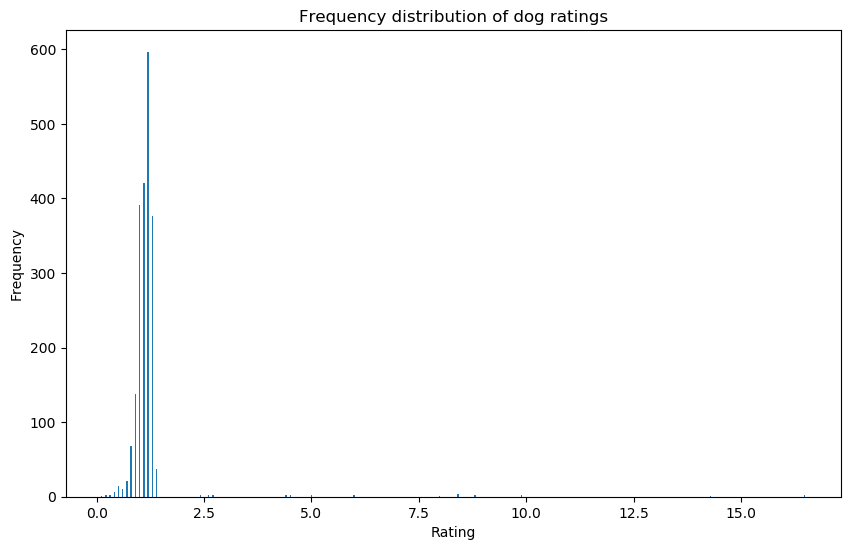

In [34]:
#fig size
plt.figure(figsize=(10, 6.18), dpi=100)

#x-axis name
plt.xlabel('Rating')
#y-axis name 
plt.ylabel('Frequency')
#title
plt.title('Frequency distribution of dog ratings')

#plot
plt.hist(rating_df[0], bins=500 );

Int64Index([0], dtype='int64')

### Question #2

#### Does a dog's rating affect the number of `favourites` it receives?

* `rating` already exists
* extract `favourites`
* create a scatter plot

In [6]:
#extract `favourites`
favourites = list(df.favorite_count)

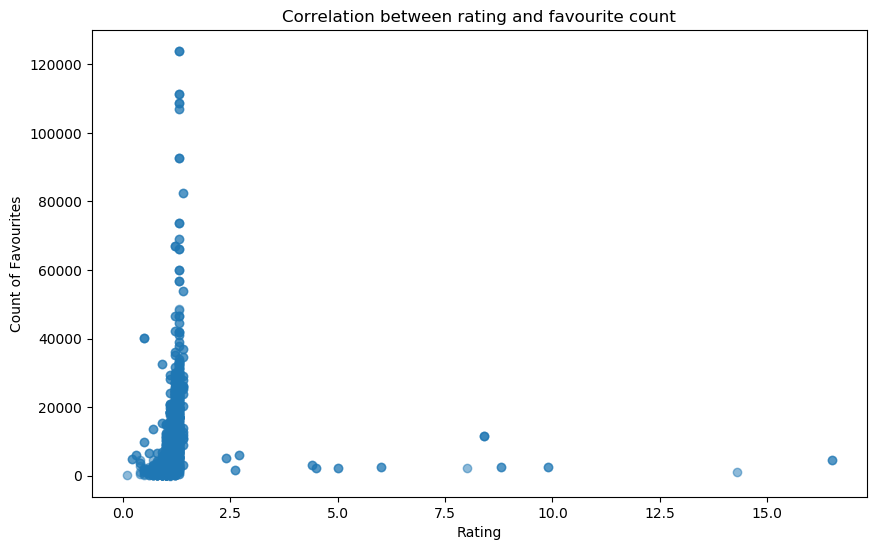

In [9]:
#fig size
plt.figure(figsize=(10, 6.18), dpi=100)

#x-axis name
plt.xlabel('Rating')
#y-axis name 
plt.ylabel('Count of Favourites')
#title
plt.title('Correlation between rating and favourite count' )

#plot
plt.scatter(rating,favourites, alpha=0.5);

#### Findings

* there appears to be no clear correlation between `ratings` and `favorite_count`
    * majority of the observations are clustered around the values 0.5 to 2.0, that is to say, 5/10 to 20/10


what happens when the variables are swapped?
  * the converse occurs, trivially
  * conclusion: there appears to be no clear correlation between the variables

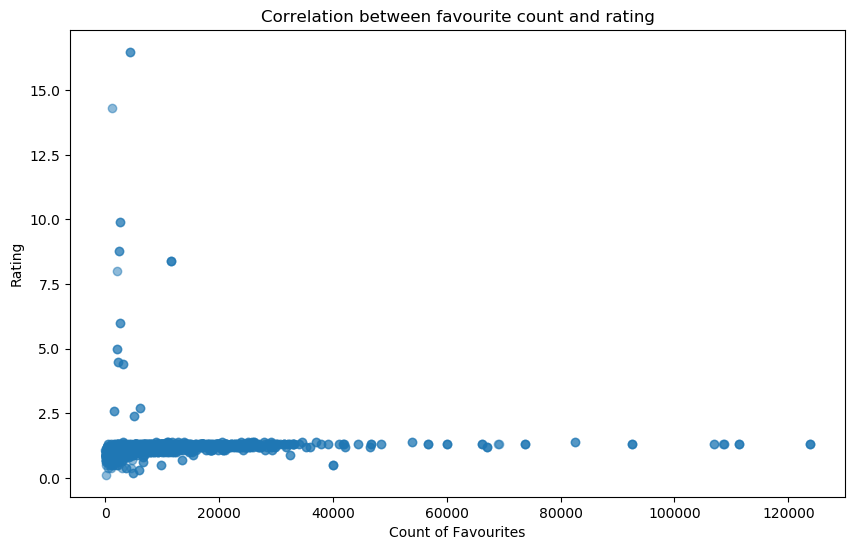

In [12]:
#fig size
plt.figure(figsize=(10, 6.18), dpi=100)

#x-axis name
plt.xlabel('Count of Favourites')
#y-axis name 
plt.ylabel('Rating')
#title
plt.title('Correlation between favourite count and rating' )

#plot
plt.scatter(favourites, rating, alpha=0.5);

### Question #3

#### Does a dog's rating affect its re-tweet count?

* `rating` already exists
* extract `retweet_count`
* create a scatter plot

In [8]:
retweets = list(df.retweet_count)

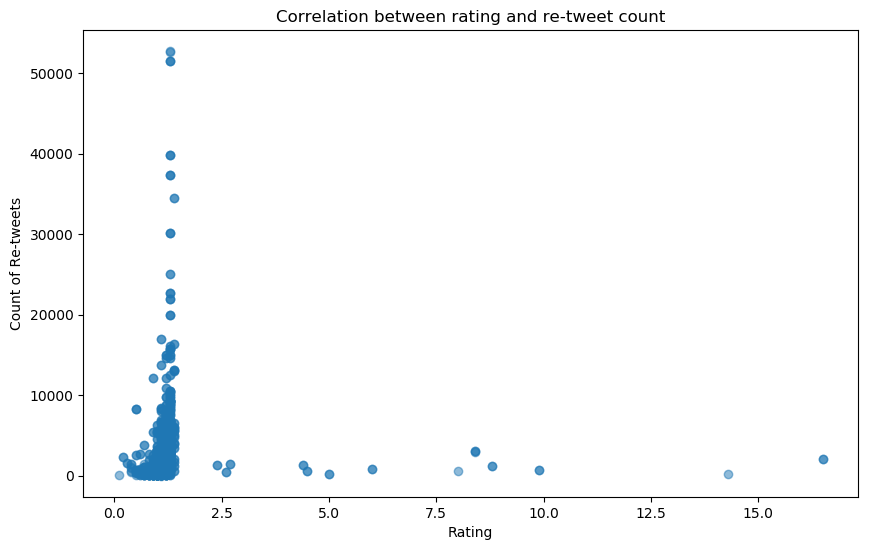

In [14]:
#fig size
plt.figure(figsize=(10, 6.18), dpi=100)

#x-axis name
plt.xlabel('Rating')
#y-axis name 
plt.ylabel('Count of Re-tweets')
#title
plt.title('Correlation between rating and re-tweet count' )

#plot
plt.scatter(rating, retweets, alpha=0.5);

#### Findings

* there appears to be no clear correlation between `ratings` and `retweet_count`
    * majority of the observations are clustered around the values 0.5 to 2.0, that is to say, 5/10 to 20/10


### Question #4

#### What type of dog is popular?

* find the sum of unique values  in the `prediction_N` variables
* plot the top ten

In [20]:
#top 10 counts of prediction_N
pred1_top_ten = df.prediction_1.value_counts()[:10]
pred2_top_ten = df.prediction_2.value_counts()[:10]
pred3_top_ten = df.prediction_3.value_counts()[:10]

In [21]:
#a dict for each
pred1_dict = {k:v for (k,v) in zip(pred1_top_ten.index, pred1_top_ten.values)}
pred2_dict = {k:v for (k,v) in zip(pred2_top_ten.index, pred2_top_ten.values)}
pred3_dict = {k:v for (k,v) in zip(pred3_top_ten.index, pred3_top_ten.values)}

In [22]:
pred1_dict

{'golden_retriever': 218,
 'Pembroke': 143,
 'Labrador_retriever': 132,
 'Chihuahua': 87,
 'pug': 65,
 'chow': 50,
 'Pomeranian': 50,
 'malamute': 49,
 'cocker_spaniel': 43,
 'toy_poodle': 43}

In [23]:
pred2_dict

{'Labrador_retriever': 134,
 'Cardigan': 122,
 'golden_retriever': 101,
 'Chihuahua': 56,
 'Siberian_husky': 55,
 'French_bulldog': 53,
 'Pomeranian': 50,
 'Chesapeake_Bay_retriever': 48,
 'cocker_spaniel': 47,
 'beagle': 47}

In [24]:
 pred3_dict

{'Labrador_retriever': 112,
 'Chihuahua': 80,
 'kelpie': 57,
 'golden_retriever': 56,
 'Eskimo_dog': 55,
 'Staffordshire_bullterrier': 49,
 'Pekinese': 46,
 'chow': 44,
 'kuvasz': 44,
 'beagle': 43}

In [25]:
#all dicts in a df
pred_gp = ['Prediction_1_count', 'Prediction_2_count', 'Prediction_3_count']
pred_df = pd.DataFrame(data=[pred1_dict, pred2_dict, pred3_dict], index=pred_gp)

#chap-chap clean
pred_df.columns = pred_df.columns.str.capitalize()
pred_df = pred_df.transpose()
pred_df.fillna(0, inplace=True)

#view df
pred_df

,Prediction_1_count,Prediction_2_count,Prediction_3_count
Cardigan,0.0,122.0,0.0
Chesapeake_bay_retriever,0.0,48.0,0.0
Chihuahua,87.0,56.0,80.0
Eskimo_dog,0.0,0.0,55.0
French_bulldog,0.0,53.0,0.0
Labrador_retriever,132.0,134.0,112.0
Pekinese,0.0,0.0,46.0
Pembroke,143.0,0.0,0.0
Pomeranian,50.0,50.0,0.0
Siberian_husky,0.0,55.0,0.0


In [26]:
#sum of values of all obs
su_0 = [i+j for (i,j) in zip(pred_df.Prediction_1_count, pred_df.Prediction_2_count)]
su_1 = [i+j for (i,j) in zip(su_0, pred_df.Prediction_3_count)]

#average of said sum
avg = [float(f'{i/3:0.0f}') for i in su_1 ]
avg

#average as a var
pred_df['Avg_pred_count'] = avg

#sort by avg, descending
pred_df.sort_values('Avg_pred_count', ascending=False, inplace=True)
pred_df

,Prediction_1_count,Prediction_2_count,Prediction_3_count,Avg_pred_count
Labrador_retriever,132.0,134.0,112.0,126.0
Golden_retriever,218.0,101.0,56.0,125.0
Chihuahua,87.0,56.0,80.0,74.0
Pembroke,143.0,0.0,0.0,48.0
Cardigan,0.0,122.0,0.0,41.0
Pomeranian,50.0,50.0,0.0,33.0
Chow,50.0,0.0,44.0,31.0
Beagle,0.0,47.0,43.0,30.0
Cocker_spaniel,43.0,47.0,0.0,30.0
Pug,65.0,0.0,0.0,22.0


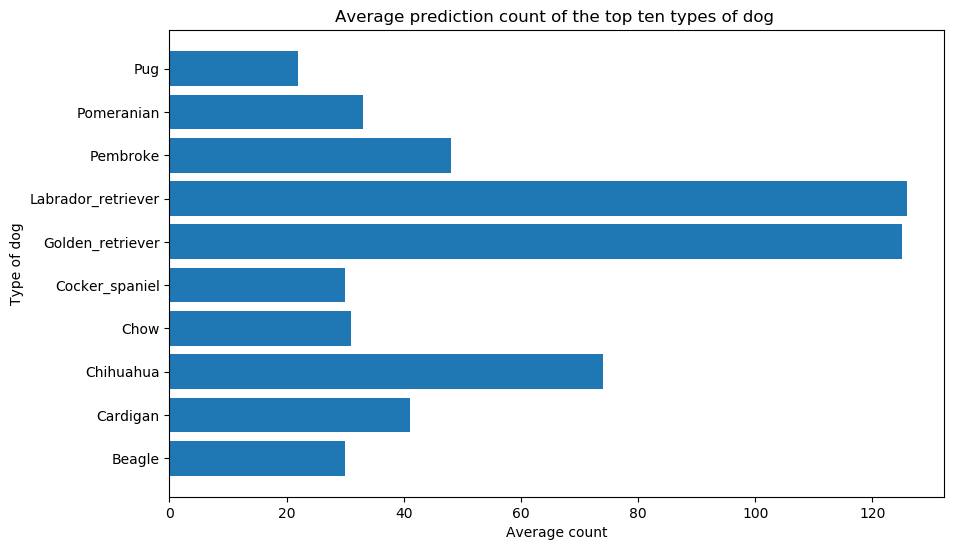

In [27]:
#fig size
plt.figure(figsize=(10, 6.18), dpi=100)

#x-axis name
plt.xlabel('Average count')
#y-axis name 
plt.ylabel('Type of dog')
#title
plt.title('Average prediction count of the top ten types of dog ' )

#x and y
x = pred_df.index[:10]
y = pred_df.Avg_pred_count[:10]

#plot
plt.barh(x, y);

#### FIndings

* `Labrador retriever` appears to be the most popular
* `retriever`-type dogs take the first 2 positions 


### Question #5

#### What is the correlation between the rating of a dog, its retweets and favourites?

* `rating` `retweets` and `favourite` exist
* use `seaborn` to visualise the relationship
* use the `corr()` method to see what the correlation is

In [9]:
#df to use for viz
corr_df = pd.DataFrame(data=[rating, retweets, favourites], index=['Rating', 'Re-tweets', 'Favourite'])
corr_df = corr_df.transpose()
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109 entries, 0 to 2108
Data columns (total 3 columns):
Rating       2109 non-null float64
Re-tweets    2109 non-null float64
Favourite    2109 non-null float64
dtypes: float64(3)
memory usage: 49.5 KB


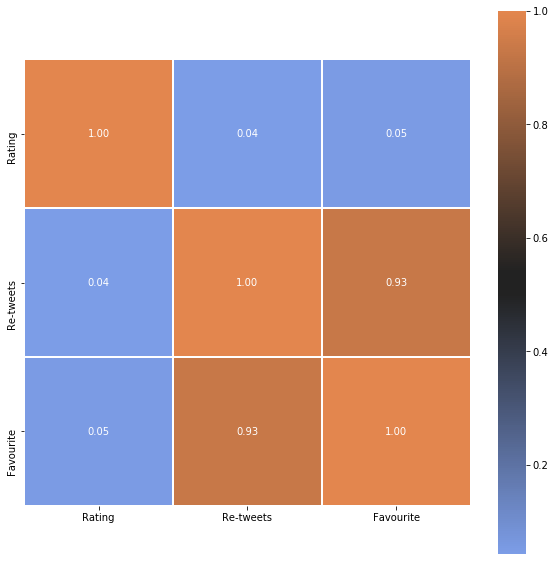

In [18]:
#sub-plots
f, ax = plt.subplots(figsize=(10, 10))

#correlation matrix
corr = corr_df.corr()

#plot
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(255, 32, l=65, center="dark", as_cmap=True), square=True, ax=ax, annot=True, fmt="0.2f", linewidths=.5);


In [100]:
#view the correlation matrix
corr

,Rating,Re-tweets,Favourite
Rating,1.000000,0.042516,0.051508
Re-tweets,0.042516,1.000000,0.931299
Favourite,0.051508,0.931299,1.000000


#### Findings

* there appears to be a strong positive correlation between
    * `retweet_count` and `favorite_count` -> _c._ 0.93
* there appears to be a weak positive correlation between
    * `rating` and `retweet_count` -> _c._ 0.04
    * `rating` and `favorite_count` -> _c._ 0.05

### Summary of Insights

1. average rating of a dog is c. 1.18, that is to say, 11.8 out of 10
2. majority of the ratings are close to the mean
3. there appears to be a weak positive correlation between `ratings` and `favorite_count`
4. `Labrador retriever` appears to be the most popular
5. `retriever`-type dogs take the first 2 positions
6. there appears to be a strong positive correlation between `retweet_count` and `favorite_count`
7. there appears to be a weak positive correlation between `rating` and `retweet_count`

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Wrangle_and_Analyse_Data.html'])

255